# TP -- Regression Linéaire -- sklearn + Regularisation

# Version "démo de cours - à remplir" (pas forcément faite parfaitement)

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

### Remarque: les parties sont indépendantes

# Partie 1 - mise en pratique

Puisqu'on n'a jamais fait de régression linéaire en TD, et qu'on en a parlé, mais assez rapidement, en cours, on commence par une illustration de ce que peut faire la régression linéaire, sur un cas concret:

C'est le fameux *boston house market* data set: 

https://www.kaggle.com/vikrishnan/boston-house-prices/ 

On s'inspire assez amplement de la solution de l'autrice du dataset, au moins pour ce qui est du chargement des données:

https://www.kaggle.com/vikrishnan/house-sales-price-using-regression

En gros, on a des données sur différents quartiers de Boston, et pour chaque quartier, on a le prix médian des maisons (ou appartements). On cherche à comprendre comment certains facteurs du voisinage déterminent le prix des maisons d'un quartier. Ou bien plus simplement, dans le cadre de ce DM, on se contente de tenter de prédire le prix des maisons en fonction des données fournies en entrée.

Comme d'habitude, on a $N$ points dans l'ensemble d'entraînement, chaque point de donnée est en dimension $D$, et les labels à prédire sont des valeurs continues, $y_n\in \mathbb{R}$.

In [3]:
# chargement des données
filename = "TP-RegressionLineaire-data-partie1-housing.csv"
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)
dataset.head(4)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4

In [4]:
## les colonnes (sauf la dernière) correspondent aux variables explicatives du prix (features)
features = dataset.columns[:-1]

# la derniere colonne, MEDV, correspond à la valeur médiane (Median Value) des maisons dans un quartier
label = dataset.columns[-1]

In [5]:
features, label

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 'MEDV')

In [6]:
## on convertit les tableaux pandas en tabeaux numpy
X = dataset[features].values
Y = dataset[label].values
X.shape,Y.shape

((506, 13), (506,))

## Partie 1.1 - entrainement, validation, test

**C'est à vous de jouer !**

Il va vous falloir: (il y a des bouts de codes donnés, plus bas)
- Séparer les données en entrainement/test (30% pour le test, 70% l'entrainement)
- Utiliser le modèle d'apprentissage `sklearn.linear_model.Ridge`, qui correspond à la regression linéaire avec régularisation de type Ridge, c.a.d. de type $\alpha ||\vec{w}||_2^2$. Ce modèle dépend d'un hyper-paramètre $\alpha$ `alpha`, qui correspond au niveau de régularisation  (souvent noté $\lambda$ (lambda) en cours).
- Appliquer la cross-validation sur l'ensemble dit "d'entrainement" (les 70%). Utilisez 5 "plis" (*fold*). Cela va permettre de trouver la meilleure valeur possible pour l'hyper-paramètre `alpha`.
- Une fois la valeur idéale de $\alpha=\alpha^*$ trouvée, entrainer le modèle sur l'ensemble de l'ensemble d'entrainement (la totalité des 70%) et mesurer le score sur l'ensemble de test (et tant qu'à faire, aussi sur l'ensemble d'entrainement).

------
- Séparer les données en entrainement/test (30% pour le test, 70% l'entrainement)

On fait le fameux train-test split (séparation des données en ensemble d'entrainement+ensemble de test)

Indice: utilser, si vous le souhaitez, la méthode  `sklearn.model_selection.train_test_split`

In [7]:
test_ratio = 0.30
seed = 7
# X_train, X_test, Y_train, Y_test =  ??
X_trainval, X_test, Y_trainval, Y_test\
  = sklearn.model_selection.train_test_split(X, Y, \
                                             test_size=test_ratio, \
                                             random_state=seed)


In [8]:
X_trainval.shape, X_test.shape

((354, 13), (152, 13))

In [9]:
np.logspace(-4,3, num=8)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [10]:
# exemple de definition d'un modèle
monModele = sklearn.linear_model.Ridge(alpha=3)

In [11]:
monModele.coef_

AttributeError: 'Ridge' object has no attribute 'coef_'

In [13]:
# sklearn.metrics.mean_squared_error
monModele.fit(X_trainval, Y_trainval)

Ridge(alpha=3)

In [14]:
monModele.coef_, monModele.intercept_

(array([-0.10396066,  0.03151144, -0.02562067,  2.52330249, -4.04050118,
         5.33978537, -0.01872135, -1.13673954,  0.2334374 , -0.01187392,
        -0.82442294,  0.01208213, -0.40465724]),
 15.737326593539056)

In [15]:
monModele.score(X_trainval, Y_trainval)

0.7568212764807505

In [18]:
myCV = sklearn.model_selection.cross_validate(monModele, \
                X_trainval, Y_trainval, return_train_score=True)



In [19]:
myCV

{'fit_time': array([0.00120449, 0.00110698, 0.00100875, 0.00123143, 0.0012536 ]),
 'score_time': array([0.00054502, 0.00053024, 0.00047302, 0.00072265, 0.00055504]),
 'test_score': array([0.67090538, 0.64121743, 0.65086255, 0.82623719, 0.81289076]),
 'train_score': array([0.77603053, 0.77243994, 0.77060669, 0.73860001, 0.7429116 ])}

In [21]:
myCV['train_score']
myCV['test_score']

array([0.67090538, 0.64121743, 0.65086255, 0.82623719, 0.81289076])

In [22]:
monModele

Ridge(alpha=3)

In [23]:
monModele.set_params(alpha=4)

Ridge(alpha=4)

In [24]:
monModele

Ridge(alpha=4)

In [27]:
alphaRange = np.logspace(-4,3, num=8)
i=0
for alpha in alphaRange:
    print(i,alpha)
    i+=1

0 0.0001
1 0.001
2 0.01
3 0.1
4 1.0
5 10.0
6 100.0
7 1000.0


In [38]:
alphaRange = np.logspace(-4,3, num=8)
nombreDePlisDeCV = 10 
trainScore = np.zeros((alphaRange.shape[0], nombreDePlisDeCV))
validScore = np.zeros((alphaRange.shape[0], nombreDePlisDeCV))
for i, alpha in enumerate(alphaRange):
#     monModele.set_params(alpha=alpha)
    monModele = sklearn.linear_model.Ridge(alpha=alpha)
    myCV = sklearn.model_selection.cross_validate(monModele, \
                X_trainval, Y_trainval, \
                cv = nombreDePlisDeCV, return_train_score=True)
    trainScore[i] = myCV['train_score']
    validScore[i] = myCV['test_score']

In [39]:
trainScore, validScore

(array([[0.75782701, 0.78237671, 0.76847323, 0.76752844, 0.76228886,
         0.77030164, 0.75105029, 0.75559366, 0.74894356, 0.76165008],
        [0.757827  , 0.7823767 , 0.76847323, 0.76752843, 0.76228885,
         0.77030164, 0.75105028, 0.75559365, 0.74894355, 0.76165007],
        [0.75782579, 0.78237581, 0.76847239, 0.76752747, 0.76228789,
         0.77030103, 0.75104945, 0.75559275, 0.74894259, 0.76164924],
        [0.75772505, 0.78230151, 0.76840331, 0.76744758, 0.76220933,
         0.77025057, 0.75098014, 0.7555183 , 0.74886315, 0.76157958],
        [0.75486863, 0.78015719, 0.76657462, 0.76526684, 0.76012472,
         0.76880611, 0.74900795, 0.75350757, 0.74666027, 0.75954231],
        [0.74637738, 0.77340542, 0.7614655 , 0.75927843, 0.75435625,
         0.76404018, 0.74311368, 0.74756696, 0.74024385, 0.75328218],
        [0.710292  , 0.74055329, 0.73094224, 0.72964137, 0.7270097 ,
         0.73441322, 0.71466848, 0.71528312, 0.70898908, 0.72175262],
        [0.64440546, 0.6657

[]

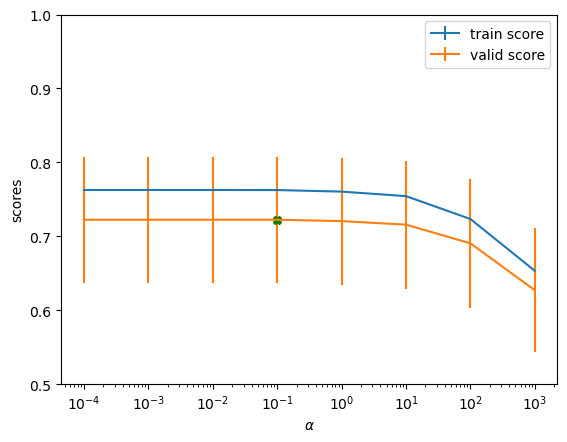

In [48]:
## plot des scores en fonction de l'hyper-param. nc
## c'est cadeau (rien à faire ici)
plt.figure()
plt.errorbar(alphaRange, np.mean(trainScore,axis=1)   , label= "train score",yerr=np.std(trainScore,axis=1))
plt.errorbar(alphaRange, np.mean(validScore,axis=1)   , label= "valid score",yerr=np.std(validScore,axis=1))
## affichage du meilleur point (ensemble de validation)
## ici on fait un choix primaire, sans tenir compte d el'overfitting, etc:
## il peut etre affiné a la main
linear_valid_score = np.mean(validScore,axis=1)
bestIndex = np.argmax( linear_valid_score )
bestNC = alphaRange[bestIndex ]
plt.plot(bestNC, linear_valid_score[bestIndex], marker='X', color='green')
plt.xlabel(r"$\alpha$")
plt.ylabel("scores")
plt.legend()
plt.ylim([0.5,1])
plt.semilogx()

## Partie 1.2 visualisation et exploitation des résultats 

Ici on va se limiter à très peu de choses:
    - comparer les Y_train_pred aux Y_train
    - comparer les Y_test_pred aux Y_test
    


In [ ]:
xmin= min(Y_train.min(), Y_train_pred.min() )-1
xmax= max(Y_train.max(), Y_train_pred.max() )+1

## Faut il standardiser les entrées ?

In [ ]:
import sklearn.preprocessing

In [ ]:
scaler = sklearn.preprocessing.StandardScaler()


In [ ]:
fig = plt.figure(1)
plt.scatter(Y_train, Y_train_pred, marker='x', label='train')
plt.scatter(Y_test , Y_test_pred , marker='+', label='test')

# plt.scatter(??, ??, marker='x', label='train')
# plt.scatter(??, ??, marker='+', label='test')
plt.legend()
plt.xlabel('verite terrain')
plt.xlabel('prediction du modele') # xlabel ou ylabl: a vous de voir
plt.plot([xmin,xmax], [xmin,xmax], lw=3, color='k', ls='--') ## droite separatrice d'equation x2=x1
ax = fig.add_subplot(111)
ax.set_aspect('equal') # on veut une figure carrée et pas allongée.
# plt.xlim([xmin,xmax])
# plt.ylim([xmin,xmax])